In [1]:
import os
from datetime import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import pandas as pd
import seaborn as sns
import talib as ta
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D,MaxPooling2D
from CNN_Functions_new import *
from DataPrep import *
from CNN_Labels import *
from keras.callbacks import CSVLogger
from decimal import Decimal, getcontext
from sklearn.metrics import confusion_matrix

In [16]:
tickers = ['NVDA','TWTR','MSFT','GOOG','AAPL','TSLA']
#tickers = ['NVDA','TWTR']
dfs = []
testdfs = []
images = []
testimages = []
cnnpred2 = []

for i in range(len(tickers)):
    
    df = pd.DataFrame()
    
    if(tickers[i] == 'AAPL' or tickers[i] == 'BMW'):
        df = pd.read_csv("/Users/rorymurray/Desktop/FYP/Data/"+tickers[i]+".csv", sep =';')
    else:
        df = pd.read_csv("/Users/rorymurray/Desktop/FYP/Data/"+tickers[i]+".csv", sep =',')
        
    df.columns = ['Ticker','Per','Date','Time','Open','High','Low','Close','Vol']
    
    df = prepareData(df)
    trend_labels(df,'Close',window_size = 30,threshold = 5)
    
    split_date = datetime(2020,1,1)
    end_date = datetime(2020,12,31)
    df_test = df.loc[df.index>split_date]
    df_test = df_test.loc[df_test.index<end_date]
    df = df.loc[df.index<split_date]
    
    df,SCdf_test = scale(df,df_test)

    df_x,df_y = create_images(df,15)
    df_testx,df_testy = create_images(SCdf_test,15) 
    
    df.name = tickers[i]
    df_test.name = tickers[i] +'_test'
    
    
    images.append([df_x,df_y])
    testimages.append([df_testx,df_testy])
    dfs.append(df)
    testdfs.append(df_test)
    


Xtrain = np.vstack((images[0][0],images[1][0],images[2][0],images[3][0],images[4][0],images[5][0]))
Ytrain = np.hstack((images[0][1],images[1][1],images[2][1],images[3][1],images[4][1],images[5][1]))
#Xtrain = np.vstack((images[0][0],images[1][0]))
#Ytrain = np.hstack((images[0][1],images[1][1]))

unique, counts = np.unique(Ytrain, return_counts=True)
print('Class inbalance',counts)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(15,20), padding = 'same'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(filters=64, kernel_size=(3), activation='relu', padding = 'same'))
model.add(MaxPooling1D(pool_size=(2)))


model.add(Flatten())
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))
    
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'] )
model.summary()

with open('CNNSummary_23.csv','a') as fd:
    model.summary(print_fn=lambda x: fd.write(x + '\n'))
csv_logger = CSVLogger('CNNlog_23.csv', append=True, separator=',')
unique, counts = np.unique(Ytrain, return_counts=True)

weightx = counts[1]/counts[0]
weightx = round(weightx, 2)
getcontext().prec = 2
weighty = float(Decimal(1) - Decimal(weightx))
history = model.fit(Xtrain,Ytrain,epochs=30,verbose=1,class_weight = {0:0.05,1:0.95},callbacks=[csv_logger])



#selldates = [100,50,7]
for i in range(2):
    cnnpred = Test(model,testimages[i][0],testimages[i][1],testdfs[i],window_size=15)
    cnnpred2.append(cnnpred)
    paperTrade(cnnpred,100,10000)

    

trend labels
trend labels
trend labels
trend labels
trend labels
trend labels
Class inbalance [63472  3823]
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 15, 32)            1952      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 7, 32)             0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 7, 64)             6208      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 3, 64)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 965       
____________

3230


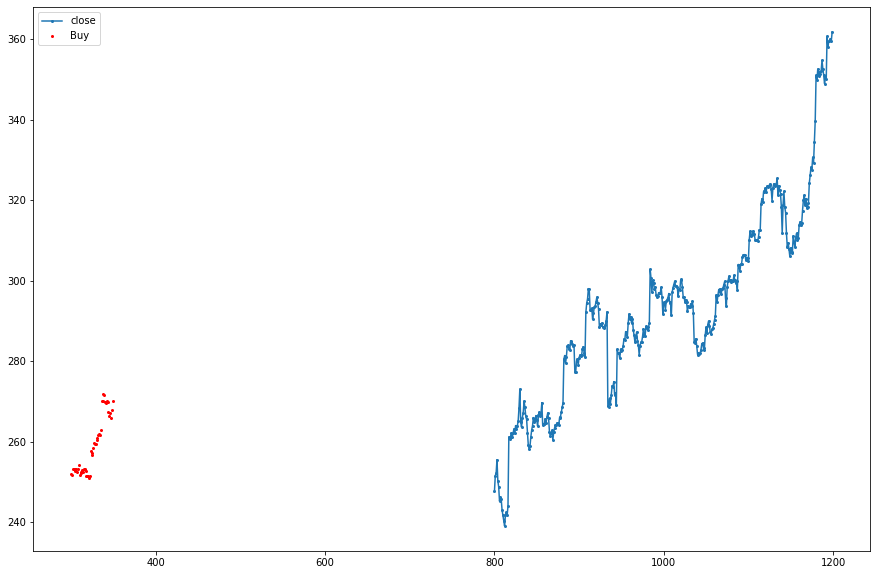

In [24]:

buysignals = cnnpred2[0].loc[cnnpred2[0]['Label'] == 1]
print(len(buysignals))

plt.figure(figsize=(15,10))
plt.plot(cnnpred2[0]['Close'].iloc[800:1200],'o-',label="close",ms = 2)
plt.plot(buysignals['Close'].iloc[300:350],'o',ms = 2,label = "Buy",color = 'red')
plt.legend()

In [35]:
cnnpred2[1]

,Close,Label
0,31.67,1.0
1,31.61,1.0
2,31.56,1.0
3,31.53,1.0
4,31.50,1.0
...,...,...
3243,54.30,1.0
3244,54.32,1.0
3245,54.27,1.0
3246,54.26,1.0


In [15]:
unique, counts = np.unique(Ytrain, return_counts=True)

s = counts[1]/counts[0]
s = round(s, 2)
s

0.09

In [11]:
ef = 65869
td = 1398
s = td/ef
s = round(s, 2)
s

0.02

In [7]:
testdfs[4]

,Open,High,Low,Close,Vol,RSI_14,RSI_10,RSI_6,RSI_2,MOM_8,...,ATR_14,ATR_10,ATR_6,VAR,MA_10,MA_30,MA_50,MA_200,MACD,Label
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-01-02 10:00:00,145.890,145.91,145.130,145.80,50898,61.742351,67.231276,76.364456,86.568514,0.6550,...,0.334767,0.349577,0.393333,0.062336,145.38202,145.349297,145.471254,143.677316,0.039157,0
2020-01-02 10:30:00,145.800,145.82,145.405,145.60,52541,55.266147,57.471922,58.678812,32.314708,0.4000,...,0.340498,0.356120,0.396944,0.037916,145.43802,145.346963,145.477654,143.704019,0.049306,0
2020-01-02 11:00:00,145.600,145.70,145.290,145.69,30368,57.430049,60.349755,63.272061,56.724168,0.3900,...,0.345462,0.361508,0.399120,0.009544,145.49252,145.346963,145.481454,143.730619,0.063875,0
2020-01-02 11:30:00,145.720,145.99,145.720,145.74,20733,58.627414,61.939577,65.806052,69.104181,0.3198,...,0.342215,0.355357,0.382600,0.006320,145.54652,145.346297,145.484688,143.758019,0.078550,0
2020-01-02 12:00:00,145.650,145.68,145.410,145.58,18233,53.446819,54.211033,52.023256,24.411002,0.3500,...,0.341343,0.352821,0.373833,0.006896,145.57452,145.342463,145.483888,143.784469,0.076389,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 14:00:00,156.160,156.23,155.870,156.17,10503,73.666766,78.135926,85.766928,98.105333,0.9500,...,0.434889,0.417682,0.387360,0.018544,155.63300,154.412000,153.687700,152.369175,0.718154,0
2020-12-30 14:30:00,156.100,156.15,155.940,156.10,19044,71.964400,75.292589,78.925192,40.525638,0.7000,...,0.420254,0.398914,0.361133,0.001024,155.82600,154.519333,153.762300,152.404975,0.710641,0
2020-12-30 15:00:00,156.085,156.29,156.050,156.16,14903,72.549948,76.120187,80.523267,70.353885,0.7700,...,0.407379,0.383022,0.340944,0.000976,155.92000,154.631333,153.834100,152.440875,0.701443,0


In [21]:
filename = 'EvaluationCNN.txt'
f = open(filename,'a')
print('file : ',filename,file=f)
print('ttttttt',file=f)
f.close()

In [43]:
in_arr1 = np.array([[ 1, 2, 3] ,[ -1, -2, -3]])
print ("1st Input array : \n", in_arr1) 
in_arr3 = np.array([[ 1, 2, 3] ,[ -1, -2, -3]])
in_arr2 = np.array([ 4, 5, 6] )
print ("2nd Input array : \n", in_arr2) 
  
# Stacking the two arrays vertically
out_arr = np.vstack((in_arr1, in_arr2))
out_arr = np.vstack((in_arr3))
print(out_arr)

1st Input array : 
 [[ 1  2  3]
 [-1 -2 -3]]
2nd Input array : 
 [4 5 6]
[[ 1  2  3]
 [-1 -2 -3]]


In [7]:
BuyHold(testdfs[3])

P&L :  30 %


In [57]:
def CNN(kernal,window,image):
    #tickers = ['NVDA','TWTR','MSFT','GOOG','AAPL','TSLA']
    #tickers = ['NVDA','TWTR','MSFT','GOOG']
    tickers = ['DAL']
    #tickers = ['NVDA','TWTR','JJ','DAL','MSFT','BMW']
    dfs = []
    testdfs = []
    images = []
    testimages = []

    for i in range(len(tickers)):
    
        df = pd.DataFrame()
    
        if(tickers[i] == 'AAPL' or tickers[i] == 'BMW'):
            df = pd.read_csv("/Users/rorymurray/Desktop/FYP/Data/"+tickers[i]+".csv", sep =';')
        else:
            df = pd.read_csv("/Users/rorymurray/Desktop/FYP/Data/"+tickers[i]+".csv", sep =',')
        
        df.columns = ['Ticker','Per','Date','Time','Open','High','Low','Close','Vol']
    
        df = prepareData(df)
        trend_labels(df,'Close',window_size = window,threshold =5)
    
        split_date = datetime(2020,1,1)
        end_date = datetime(2020,12,31)
        df_test = df.loc[df.index>split_date]
        df_test = df_test.loc[df_test.index<end_date]
        df = df.loc[df.index<split_date]
    
        df,SCdf_test = scale(df,df_test)

        df_x,df_y = create_images(df,image)
        df_testx,df_testy = create_images(SCdf_test,image) 
        
    
        df.name = tickers[i]
        df_test.name = tickers[i] +'_test'
    
    
        images.append([df_x,df_y])
        testimages.append([df_testx,df_testy])
        dfs.append(df)
        testdfs.append(df_test)
    


    #Xtrain = np.vstack((images[0][0],images[1][0],images[2][0],images[3][0],images[4][0],images[5][0]))
    #Ytrain = np.hstack((images[0][1],images[1][1],images[2][1],images[3][1],images[4][1],images[5][1]))
    #Xtrain = np.vstack((images[0][0],images[1][0],images[2][0],images[3][0]))
    #Ytrain = np.hstack((images[0][1],images[1][1],images[2][1],images[3][1]))
    Xtrain = images[0][0]
    Ytrain = images[0][1]
    
    #filename = 'HyperParameter.txt'
    #f = open(filename,'a')
    #print('CNN, kernal size :',kernal,' Dense layer :',dense,file=f)
    #print(' ',file=f)
    #f.close()
   
    

    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(image,20), padding = 'same'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(filters=64, kernel_size=(3), activation='relu', padding = 'same'))
    model.add(MaxPooling1D(pool_size=(2)))

   
   

   
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'] )
    model.summary()
    
    tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

    with open('CNNSummaryTrend.csv','a') as fd:
        model.summary(print_fn=lambda x: fd.write(x + '\n'))
    
    
    csv_logger = CSVLogger('CNNlogTrend.csv', append=True, separator=',')
    unique, counts = np.unique(Ytrain, return_counts=True)
    print(counts)

    weightx = counts[1]/counts[0]
    weightx = round(weightx, 2)
    getcontext().prec = 2
    weighty = float(Decimal(1) - Decimal(weightx))
    print(weightx,weighty)
    history = model.fit(Xtrain,Ytrain,epochs=30,verbose=1,class_weight = {0:weightx,1:weighty},callbacks=[csv_logger])

    selldates = [100,50,30]
    #tradeamounts = [3000,6000,10000]
    for i in range(1):
        cnnpred = Test(model,testimages[i][0],testimages[i][1],testdfs[i],window_size=image)
        print('label count',cnnpred['Label'].value_counts())
        for j in range(1):
            paperTrade(cnnpred,selldates[j],10000)
            
    return cnnpred
   

In [58]:
trend = CNN(3,50,25)

trend labels
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 25, 32)            1952      
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 12, 32)            0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 12, 64)            6208      
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 6, 64)             0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                24640     
_________________________________________________________________
dropout_17 (Dropout)         (None, 64) 

In [51]:
standard = CNN(3,30,15)

Calculating labels
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 15, 32)            1952      
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 7, 32)             0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 7, 64)             6208      
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 3, 64)             0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 192)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                12352     
_________________________________________________________________
dropout_15 (Dropout)         (None

In [ ]:
standard

In [54]:
bullish = CNN(3,30,15)

Calculating bullish labels
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           (None, 15, 32)            1952      
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 7, 32)             0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 7, 64)             6208      
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 3, 64)             0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 192)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                12352     
_________________________________________________________________
dropout_16 (Dropout)      

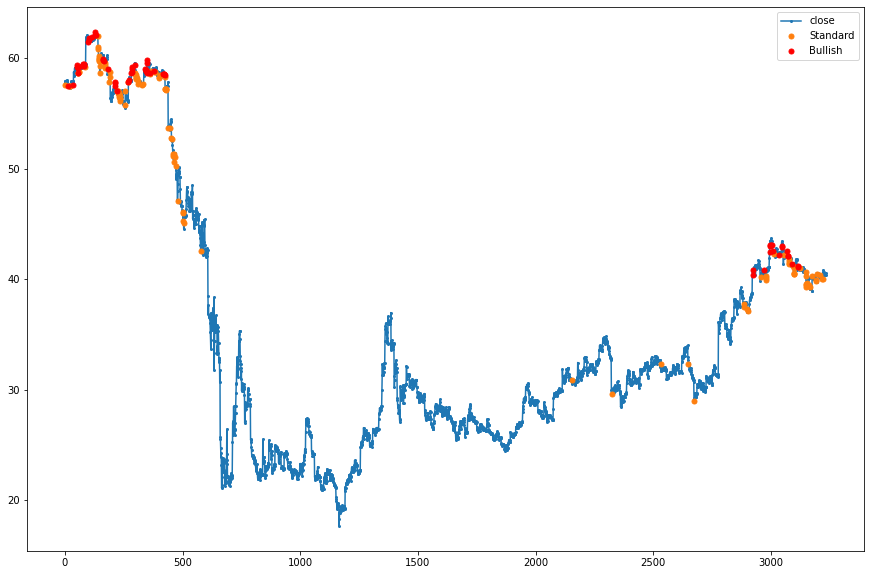

In [65]:
buysignals = bullish.loc[bullish['Label'] == 1]
buysignals2 = standard.loc[standard['Label'] == 1]
buysignals3 = trend.loc[trend['Label'] == 1]

plt.figure(figsize=(15,10))
plt.plot(standard['Close'],'o-',label="close",ms = 2)
plt.plot(buysignals2['Close'],'o',ms = 5,label = "Standard")

plt.plot(buysignals['Close'],'o',ms = 5,label = "Bullish",color = 'red')
plt.legend()

In [21]:
window = [30,50,100]
image = [15,25,50]
kernal = [3,6,9]

for j in range(3):
    CNN(3,window[j],image[j])
   

Calculating bullish labels
Calculating bullish labels
Calculating bullish labels
Calculating bullish labels
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           (None, 15, 32)            1952      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 7, 32)             0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 7, 64)             6208      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 3, 64)             0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 192)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1930      
___________

Epoch 1/30
1403/1403 [==============================] - 6s 4ms/step - loss: 0.0271 - accuracy: 0.9886
Epoch 2/30
1403/1403 [==============================] - 6s 4ms/step - loss: 0.0197 - accuracy: 0.9886
Epoch 3/30
1403/1403 [==============================] - 5s 4ms/step - loss: 0.0190 - accuracy: 0.9631
Epoch 4/30
1403/1403 [==============================] - 5s 4ms/step - loss: 0.0166 - accuracy: 0.9013
Epoch 5/30
1403/1403 [==============================] - 6s 4ms/step - loss: 0.0181 - accuracy: 0.8934
Epoch 6/30
1403/1403 [==============================] - 5s 3ms/step - loss: 0.0160 - accuracy: 0.9076
Epoch 7/30
1403/1403 [==============================] - 5s 3ms/step - loss: 0.0169 - accuracy: 0.8907
Epoch 8/30
1403/1403 [==============================] - 5s 4ms/step - loss: 0.0160 - accuracy: 0.9060
Epoch 9/30
1403/1403 [==============================] - 7s 5ms/step - loss: 0.0166 - accuracy: 0.8852
Epoch 10/30
1403/1403 [==============================] - 7s 5ms/step - loss: 0.016

In [5]:
weights = [0.92,0.94,0.96,0.98]
r = 1-weights[0]
r

0.07999999999999996

In [21]:
from decimal import Decimal, getcontext
getcontext().prec = 2

weightx = float(Decimal(1) - Decimal(weights[0]))
weighty = float(Decimal(0.92))
weightx

0.08

In [ ]:
def PLOT(kernal,window,image):
    #tickers = ['NVDA','TWTR','MSFT','GOOG','AAPL','TSLA']
    #tickers = ['NVDA','TWTR','MSFT','GOOG']
    #tickers = ['DAL']
    #tickers = ['NVDA','TWTR','JJ','DAL','MSFT','BMW']
    dfs = []
    testdfs = []
    images = []
    testimages = []

    for i in range(len(tickers)):
    
        df = pd.DataFrame()
    
        if(tickers[i] == 'AAPL' or tickers[i] == 'BMW'):
            df = pd.read_csv("/Users/rorymurray/Desktop/FYP/Data/"+tickers[i]+".csv", sep =';')
        else:
            df = pd.read_csv("/Users/rorymurray/Desktop/FYP/Data/"+tickers[i]+".csv", sep =',')
        
        df.columns = ['Ticker','Per','Date','Time','Open','High','Low','Close','Vol']
    
        df = prepareData(df)
        trend_labels(df,'Close',window_size = window,threshold = 5)
    
        split_date = datetime(2020,1,1)
        end_date = datetime(2020,12,31)
        df_test = df.loc[df.index>split_date]
        df_test = df_test.loc[df_test.index<end_date]
        df = df.loc[df.index<split_date]
    
        df,SCdf_test = scale(df,df_test)

        df_x,df_y = create_images(df,image)
        df_testx,df_testy = create_images(SCdf_test,image) 
    
        df.name = tickers[i]
        df_test.name = tickers[i] +'_test'
    
    
        images.append([df_x,df_y])
        testimages.append([df_testx,df_testy])
        dfs.append(df)
        testdfs.append(df_test)
    


    #Xtrain = np.vstack((images[0][0],images[1][0],images[2][0],images[3][0],images[4][0],images[5][0]))
    #Ytrain = np.hstack((images[0][1],images[1][1],images[2][1],images[3][1],images[4][1],images[5][1]))
    #Xtrain = np.vstack((images[0][0],images[1][0],images[2][0],images[3][0]))
    #Ytrain = np.hstack((images[0][1],images[1][1],images[2][1],images[3][1]))
    Xtrain = images[0][0]
    Ytrain = images[0][1]
    
    #filename = 'HyperParameter.txt'
    #f = open(filename,'a')
    #print('CNN, kernal size :',kernal,' Dense layer :',dense,file=f)
    #print(' ',file=f)
    #f.close()
    

    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(4), activation='relu', input_shape=(image,20), padding = 'same'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(filters=64, kernel_size=(4), activation='relu', padding = 'same'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(filters=64, kernel_size=(4), activation='relu', padding = 'same'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(filters=64, kernel_size=(4), activation='relu', padding = 'same'))
    model.add(MaxPooling1D(pool_size=(2)))
   
   

   
    model.add(Dense(64, activation='relu'))
    model.add(Flatten())
   
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'] )
    model.summary()
    
    tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

    with open('CNNSummaryTrend.csv','a') as fd:
        model.summary(print_fn=lambda x: fd.write(x + '\n'))
    
    
    csv_logger = CSVLogger('CNNlogTrend.csv', append=True, separator=',')
    unique, counts = np.unique(Ytrain, return_counts=True)
    print(counts)

    weightx = counts[1]/counts[0]
    weightx = round(weightx, 2)
    getcontext().prec = 2
    weighty = float(Decimal(1) - Decimal(weightx))
    print(weightx,weighty)
    history = model.fit(Xtrain,Ytrain,epochs=30,verbose=1,class_weight = {0:0.05,1:0.95},callbacks=[csv_logger])

    selldates = [100,50,30]
    #tradeamounts = [3000,6000,10000]
    for i in range(1):
        cnnpred = Test(model,testimages[i][0],testimages[i][1],testdfs[i],window_size=image)
        for j in range(3):
            paperTrade(cnnpred,selldates[j],10000)
    
